# BAB PENGENALAN

   ##### Nama  : Farand Austen Mahesa
   ##### Kelas : Full Bootcamp Data Science

Tujuan Program
>Pada program ini akan dilakukan semua algoritma klasifikasi untuk menentukan apakah orang tersebut akan deposit atau tidak


Isi notebook dibawah ini berupa:
   - Perkenalan
   - Import pustaka yang dibutuhkan
   - Data Loading
   - Data Cleaning
   - Eksplorasi Data
   - Data Preprocessing
   - Pendefinisian Model
   - Pelatihan Model
   - Evaluasi Model
   - Model Inference
   - Pengambilan Kesimpulan

# IMPORT DATA PUSTAKA YANG DIBUTUHKAN

In [90]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# PREPROCESSING

In [91]:
dg = pd.read_csv('bank-additional-full.csv', sep = ';')

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
dg

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [94]:
dg.y.unique()

array(['no', 'yes'], dtype=object)

In [95]:
dg.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [96]:
dg.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [97]:
dg.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [98]:
dg.shape

(41188, 21)

In [99]:
dg = dg.rename(columns =  
               {"y": "deposit"}
               
               )

In [100]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [101]:
dg.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [102]:
le = LabelEncoder()
dg['job'] = le.fit_transform(dg['job'])
dg['marital'] = le.fit_transform(dg['marital'])
dg['education'] = le.fit_transform(dg['education'])
dg['default'] = le.fit_transform(dg['default'])
dg['housing'] = le.fit_transform(dg['housing'])
dg['loan'] = le.fit_transform(dg['loan'])
dg['contact'] = le.fit_transform(dg['contact'])
dg['month'] = le.fit_transform(dg['month'])
dg['day_of_week'] = le.fit_transform(dg['day_of_week'])
dg['poutcome'] = le.fit_transform(dg['poutcome'])

In [103]:
dg

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [104]:
dg['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [105]:
dg['deposit'].replace({'no': 0, 'yes': 1},inplace = True)
dg['pdays'].replace({999: np.nan},inplace = True)

In [106]:
dg.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
deposit               0
dtype: int64

In [107]:
dg.pdays.mean()

6.014521452145215

In [108]:
dg.pdays.fillna(6, inplace = True)

In [109]:
dg.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

# EDA

In [110]:
df12 = dg.drop(columns=['campaign','pdays','previous','poutcome', 'cons.conf.idx','cons.conf.idx', 'euribor3m', 'nr.employed','deposit'])
df9 = dg[['cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed','deposit','emp.var.rate','poutcome','previous']]
df5 = dg[['campaign','pdays','previous','poutcome']]

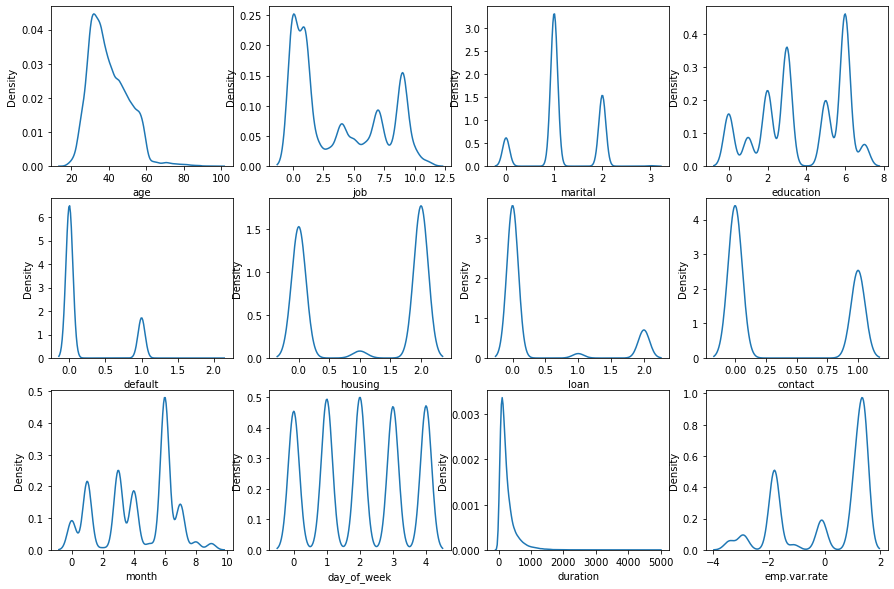

In [111]:
fig,ax = plt.subplots(3,4,figsize = (15,10))
ax = ax.flatten()
for i in range (0, df12.shape[1]-1):
    sns.kdeplot(df12.iloc[:, i], ax = ax[i])

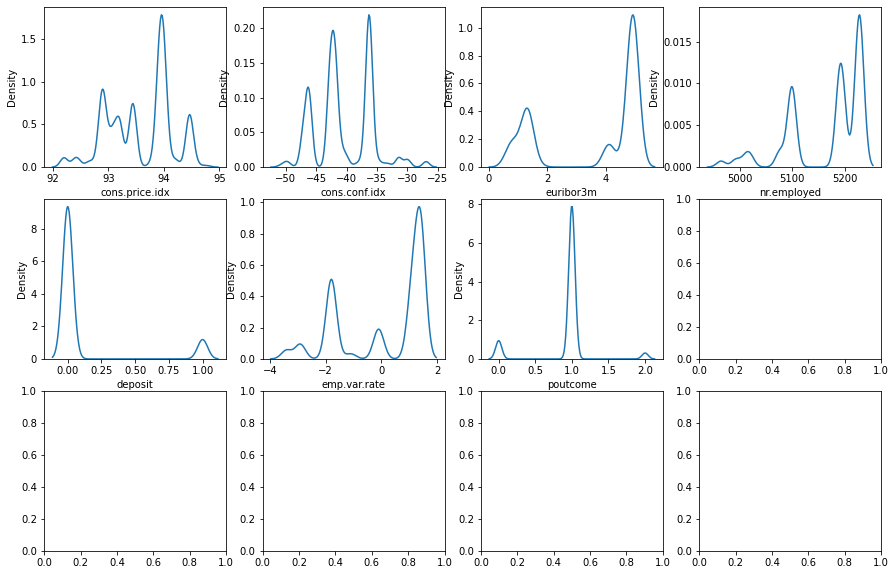

In [112]:
fig,ax = plt.subplots(3,4,figsize = (15,10))
ax = ax.flatten()
for i in range (0, df9.shape[1]-1):
    sns.kdeplot(df9.iloc[:, i], ax = ax[i])

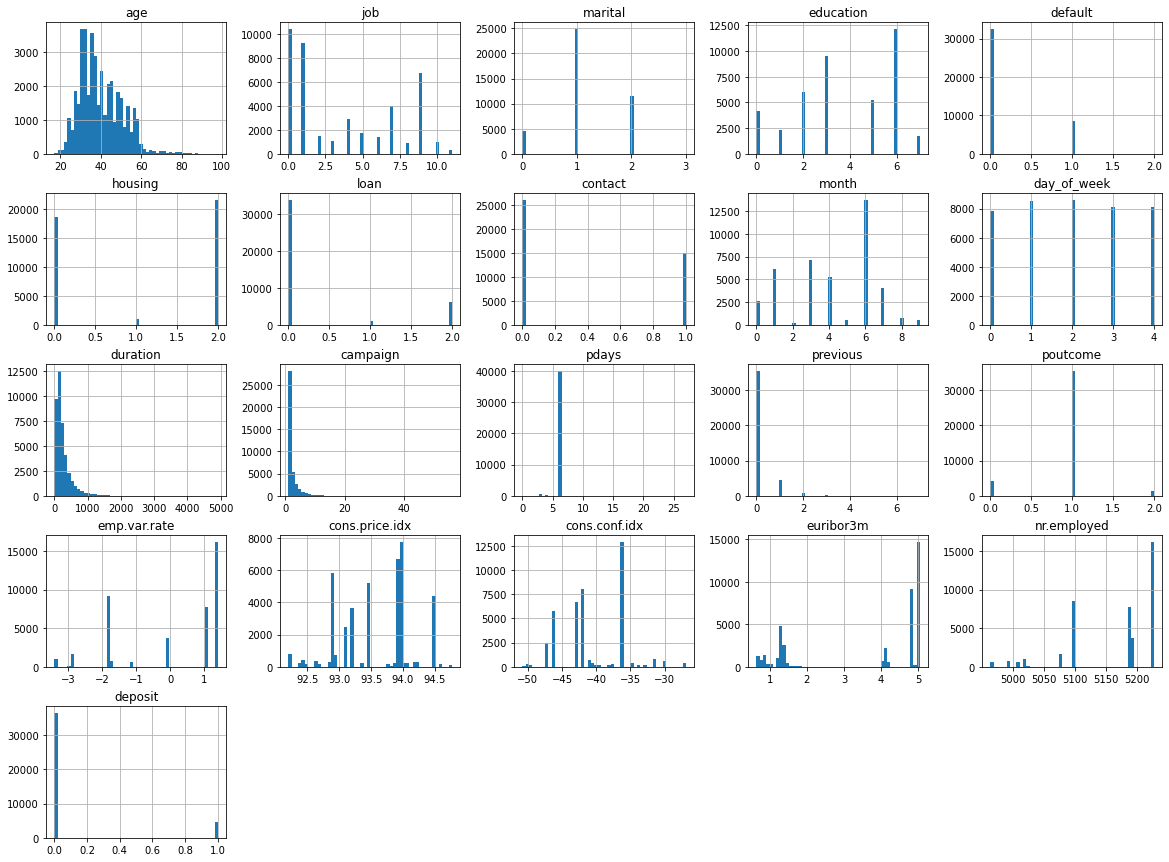

In [113]:
dg.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

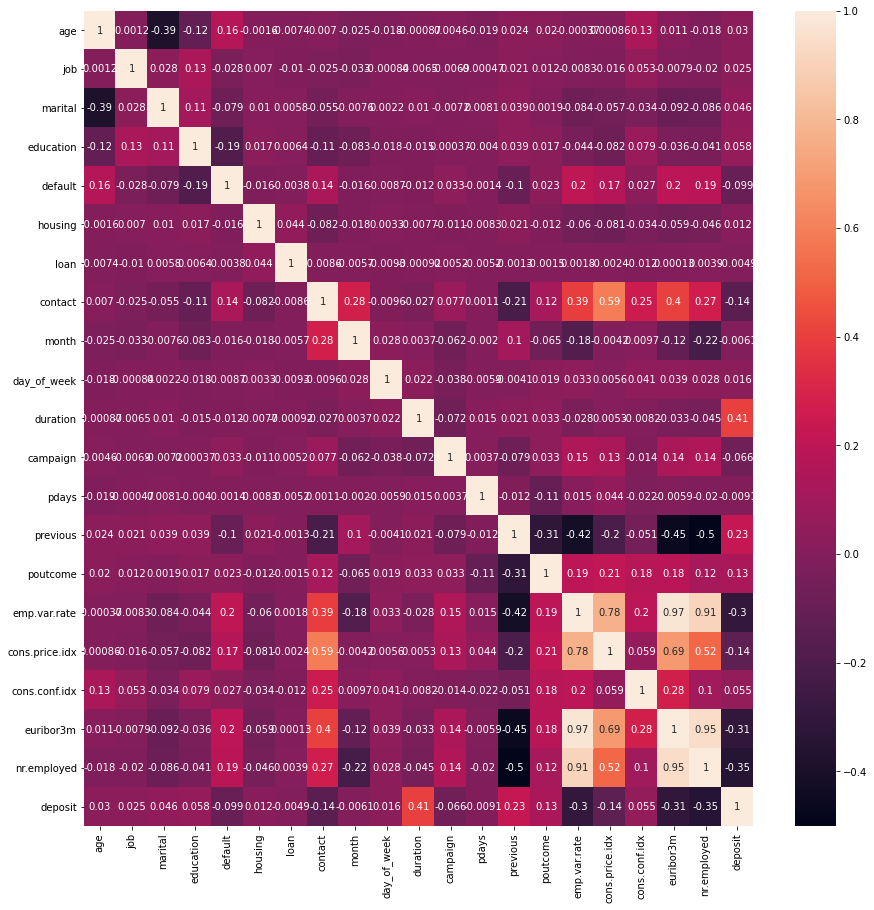

In [114]:
plt.figure(figsize=(15,15))
sns.heatmap(dg.corr(), annot=True)

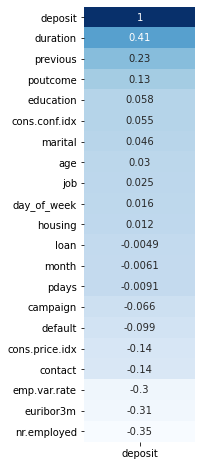

In [115]:
corr_mat = dg.corr()['deposit'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr_mat, cmap='Blues', cbar=False, annot=True)
plt.show()

<AxesSubplot:>

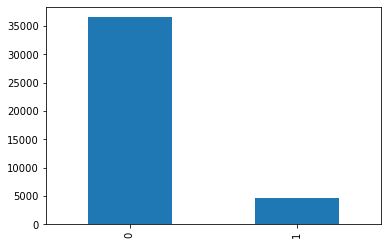

In [116]:
dg['deposit'].value_counts().plot(kind='bar')

In [117]:
deposit0 = dg[dg['deposit'] == 0]
deposit1 = dg[dg['deposit'] == 1]
new_data = pd.concat([deposit0.sample(len(deposit1), random_state =0), deposit1], axis =0).reset_index(drop=True)
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,33,9,0,5,0,0,0,1,4,4,128,1,6.0,0,1,1.4,94.465,-41.8,4.864,5228.1,0
1,38,0,0,2,0,0,0,0,7,0,71,1,6.0,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,34,1,2,2,0,2,0,0,6,3,483,1,6.0,1,0,-1.8,92.893,-46.2,1.291,5099.1,0
3,32,0,1,6,0,0,0,0,1,0,133,2,6.0,0,1,1.4,93.444,-36.1,4.963,5228.1,0
4,48,1,1,3,1,2,0,1,4,2,234,1,6.0,0,1,1.4,94.465,-41.8,4.961,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,5,1,6,0,2,0,0,7,2,208,1,1.0,6,2,-1.1,94.767,-50.8,1.031,4963.6,1
9276,62,5,1,6,0,0,0,0,7,2,483,2,6.0,3,2,-1.1,94.767,-50.8,1.031,4963.6,1
9277,37,0,1,6,0,2,0,0,7,0,281,1,6.0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
9278,73,5,1,5,0,2,0,0,7,0,334,1,6.0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


<AxesSubplot:>

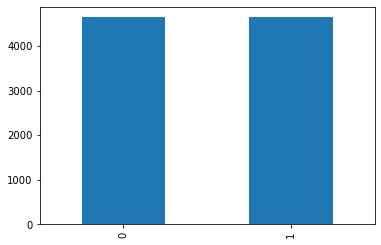

In [118]:
new_data['deposit'].value_counts().plot(kind='bar')

In [119]:
X = new_data.drop(columns='deposit')
y = new_data['deposit']

In [120]:
X_inch = sm.add_constant(X)
model = sm.OLS(y, X_inch)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,3.623201,0.249
age,0.001056,0.003
job,0.002791,0.007
marital,0.024452,0.000
education,0.006791,0.000
default,-0.037060,0.001
housing,-0.003039,0.419
loan,-0.006269,0.219
contact,-0.096058,0.000
month,-0.023722,0.000


In [121]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deposit   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     459.2
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:40:07   Log-Likelihood:                -3537.8
No. Observations:                9280   AIC:                             7118.
Df Residuals:                    9259   BIC:                             7267.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6232      3.146      1.152      0.249      -2.544       9.790
age                0.0011      0.000      2.967      0.003       0.000       0.002
job                0.0028      0.001      2.711      0.007       0.001       0.005
marital            0.0245      0.007      3.674      0.000       0.011       0.037
education          0.0068      0.002      3.769      0.000       0.003       0.010
default           -0.0371      0.011     -3.428      0.001      -0.058      -0.016
housing           -0.0030      0.004     -0.808      0.419      -0.010       0.004
loan              -0.0063      0.005     -1.229      0.219      -0.016       0.004
contact           -0.0961      0.011     -8.421      0.000      -0.118      -0.074
month             -0.0237      0.002    -12.569      0.000      -0.027      -0.020
day_of_week        0.0046      0.003      1.723      0.085      -0.001       0.010
duration           0.0007   1.03e-05     66.266      0.000       0.001       0.001
campaign          -0.0021      0.002     -1.269      0.204      -0.005       0.001
pdays             -0.0019      0.003     -0.628      0.530      -0.008       0.004
previous           0.0188      0.006      2.976      0.003       0.006       0.031
poutcome           0.1078      0.008     12.997      0.000       0.092       0.124
emp.var.rate      -0.2024      0.013    -15.624      0.000      -0.228      -0.177
cons.price.idx     0.1051      0.020      5.390      0.000       0.067       0.143
cons.conf.idx      0.0005      0.001      0.411      0.681      -0.002       0.003
euribor3m          0.1657      0.018      9.004      0.000       0.130       0.202
nr.employed       -0.0027      0.000     -8.646      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      261.771   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.675
Skew:                          -0.320   Prob(JB):                     9.62e-78
Kurtosis:                       3.712   Cond. No.                     4.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analisis regresi merupakan metode analisis yang biasa digunakan untuk melihat 2 atau banyak variabel. Umumnnya digunakan untuk melakukan prediksi dan ramalan. Hubungan variabel tersebut bersifat fungsional yang diwujudkan dalam model matematis. Selain itu analisis regresi untuk memahami variabel yang berhubungan variabel yang terkait untuk mengetahui bentuk-bentuk hubungan tersebut. 
1. Eksogenitas yang lemah
2. Linieritas
3. Varians error yang konstan
4. Autokorelasi pada data time series

In [122]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_inch.columns
vif_data['VIF'] = [variance_inflation_factor(X_inch.values, i) for i in range(X_inch.shape[1])]
vif_data

,feature,VIF
0,const,730143.781644
1,age,1.333120
2,job,1.017553
3,marital,1.270280
4,education,1.098428
5,default,1.144921
6,housing,1.010810
7,loan,1.004104
8,contact,1.939575
9,month,1.646961


In [123]:
X = X.drop(columns=['housing', 'loan','default', 'contact', 'campaign', 'day_of_week','pdays', 'cons.conf.idx','cons.price.idx','emp.var.rate', 'euribor3m','nr.employed','month'])

In [124]:
X_inch = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
age,0.000257,0.293
job,0.002767,0.020
marital,0.027991,0.000
education,0.010728,0.000
duration,0.000634,0.000
previous,0.178655,0.000
poutcome,0.111463,0.000


In [125]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                deposit   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              2546.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                        0.00
Time:                        20:40:10   Log-Likelihood:                         -4976.0
No. Observations:                9280   AIC:                                      9966.
Df Residuals:                    9273   BIC:                                  1.002e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0003      0.000      1.052      0.293      -0.000       0.001
job            0.0028      0.001      2.326      0.020       0.000       0.005
marital        0.0280      0.006      4.498      0.000       0.016       0.040
education      0.0107      0.002      5.548      0.000       0.007       0.015
duration       0.0006   1.17e-05     54.336      0.000       0.001       0.001
previous       0.1787      0.006     28.864      0.000       0.167       0.191
poutcome       0.1115      0.009     12.625      0.000       0.094       0.129
==============================================================================
Omnibus:                      969.332   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.072
Skew:                           0.127   Prob(JB):                     3.10e-65
Kurtosis:                       2.161   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_inch.columns
vif_data['VIF'] = [variance_inflation_factor(X_inch.values, i) for i in range(X_inch.shape[1])]
vif_data

,feature,VIF
0,const,36.404158
1,age,1.261718
2,job,1.012854
3,marital,1.245417
4,education,1.048111
5,duration,1.001907
6,previous,1.023965
7,poutcome,1.010165


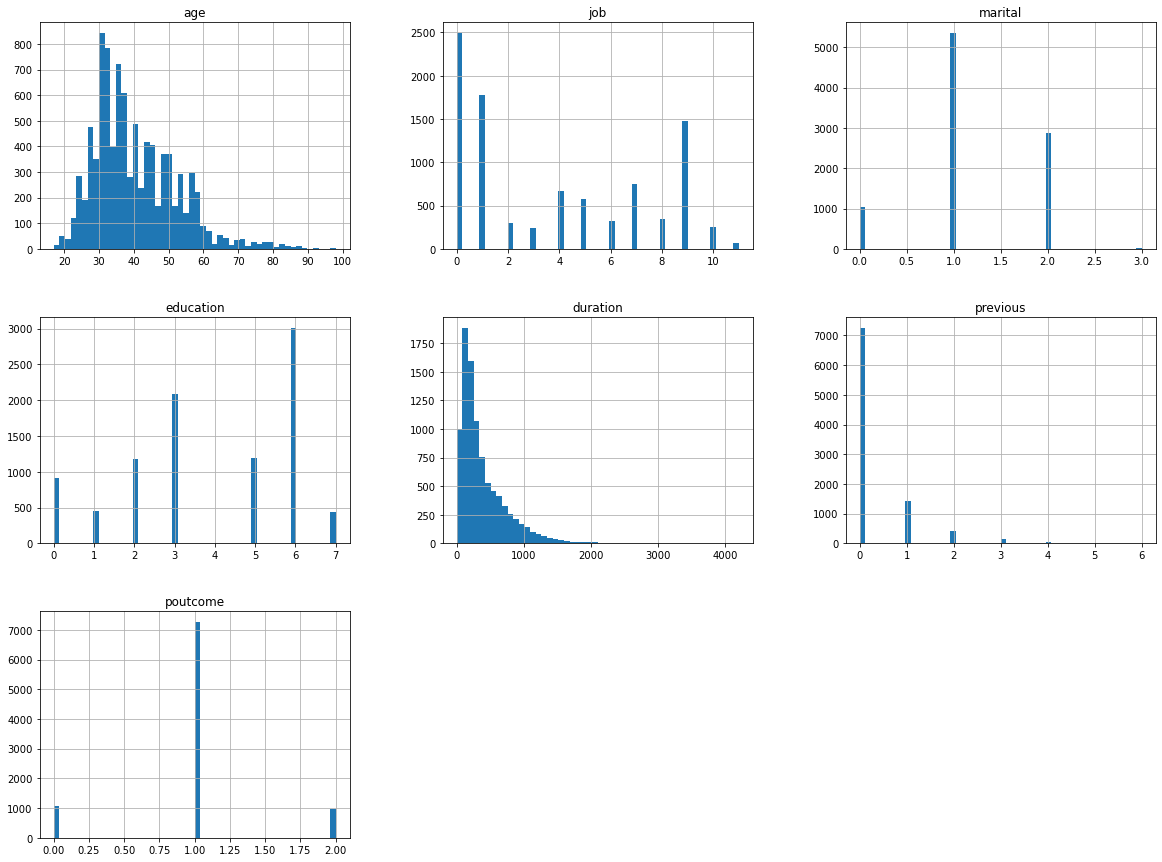

In [127]:
X.hist(bins=50, figsize=(20,15))
plt.show()

# PEMODELAN CROSS VALIDATION

In [133]:
X.shape, y.shape

((9280, 7), (9280,))

In [134]:
skf = StratifiedKFold(n_splits = 5)

In [135]:
for train_indices, test_indices in skf.split(X,y):
    print(train_indices)
    print(test_indices)

[1547 1548 1549 ... 9277 9278 9279]
[   0    1    2 ... 6184 6185 6186]
[   0    1    2 ... 9277 9278 9279]
[1547 1548 1549 ... 7730 7731 7732]
[   0    1    2 ... 7730 7731 7732]
[3094 3095 3096 ... 9277 9278 9279]


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [137]:
X[train_indices].shape

(6187, 7)

In [138]:
y[train_indices].shape

(6187,)

In [139]:
X[test_indices].shape

(3093, 7)

In [140]:
y[test_indices].shape

(3093,)

In [141]:
X[train_indices]

array([[-0.61799466,  1.44157303, -1.9277585 , ..., -0.71275687,
        -0.44730316,  0.02472717],
       [-0.19937611, -1.05340551, -1.9277585 , ..., -0.87046037,
        -0.44730316,  0.02472717],
       [-0.53427095, -0.77618567,  1.27969984, ...,  0.26943162,
         0.97865814, -2.1198346 ],
       ...,
       [-0.03192869,  1.71879286, -0.32402933, ..., -0.81512581,
        -0.44730316,  0.02472717],
       [-0.78544208, -1.05340551,  1.27969984, ..., -0.48588516,
        -0.44730316,  0.02472717],
       [-0.36682353, -1.05340551,  1.27969984, ..., -0.79022526,
        -0.44730316,  0.02472717]])

In [73]:
def print_score1(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        cross_val1 = cross_val_score(clf, X_train_trf, y_train, scoring = 'accuracy', cv=skf, n_jobs=-1)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN RESULT:\n================================================")
        print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val1) * 100:.2f}%")
        #print("_______________________________________________")
        #print(f"ACCURACY SCORE: {accuracy_score(y_train, pred) * 100:.2f}%")                             
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        print("_______________________________________________")

        
    elif train==False:
        pred = clf.predict(X_test_trf)
        cross_val1 = cross_val_score(clf, X_test_trf, y_test, scoring = 'accuracy', cv=skf, n_jobs=-1)                             
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST RESULT:\n================================================")
        print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val1) * 100:.2f}%")
        #print("_______________________________________________")                             
        #print(f"ACCURACY SCORE: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
        print("_______________________________________________")
    

# LOGISTIC REGRESSION

In [74]:
params = {
    "solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 
    "penalty":("l1", "l2", "elasticnet", "none"), 
    "C":(list(np.arange(0.1, 1, 0.1))),  
}


logit_clf = LogisticRegression(random_state=42)
logit_cv = GridSearchCV(logit_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=skf)
logit_cv.fit(X[train_indices], y[train_indices])
best_params = logit_cv.best_params_
print(f"Best paramaters: {best_params})")

logit_clf = LogisticRegression(**best_params)
logit_clf.fit(X[train_indices], y[train_indices])
print_score1(logit_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)

print_score1(logit_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.7745063         nan 0.77256675 0.77499174
 0.77499174 0.77531489 0.77499174 0.77499174        nan        nan
        nan        nan        nan 0.77563859 0.77563859        nan
 0.77563859 0.77580017        nan        nan 0.77434496        nan
 0.77321361 0.77515347 0.77515347 0.77531497 0.77515347 0.77515347
        nan        nan        nan        nan        nan 0.77563859
 0.77563859        nan 0.77563859 0.77580017        nan        nan
 0.77563828        nan 0.77434527 0.77563844 0.77563844 0.77563844
 0.77563844 0.77563844        nan        nan        nan        nan
        nan 0.77563859 0.77563859        nan 0.77563859 0.77580017
        nan        nan 0.77579994        nan 0.77483032 0.77563844
 0.77563844 0.77580009 0.77563844 0.77563844        nan        nan
        nan        nan        nan 0.77563859 0.7756385

Best paramaters: {'C': 0.9, 'penalty': 'l2', 'solver': 'liblinear'})
TRAIN RESULT:
CROSS VALIDATION ACCURACY: 77.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.767219     0.834669  0.797155     0.800944      0.800938
recall        0.853264     0.741028  0.797155     0.797146      0.797155
f1-score      0.807957     0.785066  0.797155     0.796512      0.796513
support    3094.000000  3093.000000  0.797155  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2640  454]
 [ 801 2292]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 79.11%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.744266     0.816160  0.775622     0.780213      0.780225
recall        0.839586     0.711700  0.

# NAIVE BAYES

In [75]:
bayes_clf = GaussianNB()
bayes_clf.fit(X[train_indices], y[train_indices])
print_score1(bayes_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)
print_score1(bayes_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

TRAIN RESULT:
CROSS VALIDATION ACCURACY: 71.66%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.715503     0.807375  0.753354     0.761439      0.761432
recall        0.841306     0.665373  0.753354     0.753340      0.753354
f1-score      0.773321     0.729529  0.753354     0.751425      0.751429
support    3094.000000  3093.000000  0.753354  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2603  491]
 [1035 2058]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 78.31%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.759434     0.815319  0.784675     0.787376      0.787385
recall        0.833118     0.736264  0.784675     0.784691      0.784675
f1-score      0.794571     0.773777

# K-NEIGHBORS CLASSIFIER

In [76]:
params = {
    "weights":("uniform", "distance"), 
    "metric":("euclidean", "manhattan", "chebyshev", "minkowski"), 
    "n_neighbors":(list(range(1, 20))), 
}


knn_clf = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=skf)
knn_cv.fit(X[train_indices], y[train_indices])
best_params = knn_cv.best_params_
print(f"Best paramaters: {best_params})")

knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X[train_indices], y[train_indices])
print_score1(knn_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)
print_score1(knn_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

Fitting 3 folds for each of 152 candidates, totalling 456 fits
Best paramaters: {'metric': 'chebyshev', 'n_neighbors': 19, 'weights': 'uniform'})
TRAIN RESULT:
CROSS VALIDATION ACCURACY: 78.63%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.804348     0.840123  0.821238     0.822236      0.822233
recall        0.849063     0.793404  0.821238     0.821234      0.821238
f1-score      0.826101     0.816096  0.821238     0.821098      0.821099
support    3094.000000  3093.000000  0.821238  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2627  467]
 [ 639 2454]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 80.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.768949     0.802334

# SVM

In [149]:
params = {
    "kernel":("linear", "rbf", "sigmoid"), 
    "gamma":("scale", "auto"), 
    "C":(list(np.arange(0.1, 10, 0.1))), 
}


svc_clf = SVC(random_state=42)
svc_cv = GridSearchCV(svc_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=skf)
svc_cv.fit(X[train_indices], y[train_indices])
best_params = svc_cv.best_params_
print(f"Best paramters: {best_params})")

svc_clf = SVC(**best_params, probability=True)
svc_clf.fit(X[train_indices], y[train_indices])
print_score1(svc_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)
print_score1(svc_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

Fitting 3 folds for each of 594 candidates, totalling 1782 fits
Best paramters: {'C': 0.7000000000000001, 'gamma': 'scale', 'kernel': 'rbf'})
TRAIN RESULT:
CROSS VALIDATION ACCURACY: 79.44%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.806762     0.833615  0.819622     0.820188      0.820186
recall        0.840659     0.798577  0.819622     0.819618      0.819622
f1-score      0.823362     0.815720  0.819622     0.819541      0.819542
support    3094.000000  3093.000000  0.819622  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2601  493]
 [ 623 2470]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 82.02%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.789507     0.810992  0.

# RANDOM FOREST

In [78]:
params = {
    "criterion":("gini", "entropy"),  
    "max_depth":(list(range(1, 20))),
    "max_features":[2, 3, 4],
    "n_estimators": [50, 100, 200, 300, 1000],
}


forest_clf = RandomForestClassifier(random_state=42)
forest_cv = GridSearchCV(forest_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=skf)
forest_cv.fit(X[train_indices], y[train_indices])
best_params = forest_cv.best_params_
print(f"Best paramaters: {best_params})")

forest_clf = RandomForestClassifier(**best_params)
forest_clf.fit(X[train_indices], y[train_indices])
print_score1(forest_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)
print_score1(forest_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

Fitting 3 folds for each of 570 candidates, totalling 1710 fits
Best paramaters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'n_estimators': 1000})
TRAIN RESULT:
CROSS VALIDATION ACCURACY: 79.31%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.833850     0.863560  0.848069     0.848705      0.848702
recall        0.869425     0.826705  0.848069     0.848065      0.848069
f1-score      0.851266     0.844731  0.848069     0.847998      0.847999
support    3094.000000  3093.000000  0.848069  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2690  404]
 [ 536 2557]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 81.73%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.7

# DECISION TREE

In [79]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=skf)
tree_cv.fit(X[train_indices], y[train_indices])
best_params = tree_cv.best_params_
print(f"Best paramaters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X[train_indices], y[train_indices])
print_score1(tree_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)
print_score1(tree_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramaters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'best'})
TRAIN RESULT:
CROSS VALIDATION ACCURACY: 79.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.814536     0.835058  0.824471     0.824797      0.824796
recall        0.840336     0.808600  0.824471     0.824468      0.824471
f1-score      0.827235     0.821616  0.824471     0.824426      0.824426
support    3094.000000  3093.000000  0.824471  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2600  494]
 [ 592 2501]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 79.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weig

# ARTIFICIAL NEURAL NETWORKS

In [80]:
params = {
    "activation":("identity", "logistic", "tanh", "relu"), 
    "solver":("lbfgs", "sgd", "adam"), 
    "alpha":(list(np.arange(0.0001, 0.001, 0.0001))), 
    "learning_rate":("constant", "invscaling", "adaptive"), 
}


neural_clf = MLPClassifier(random_state=42)
neural_cv = GridSearchCV(neural_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=skf)
neural_cv.fit(X[train_indices], y[train_indices])
best_params = neural_cv.best_params_
print(f"Best paramaters: {best_params})")

neural_clf = MLPClassifier(**best_params)
neural_clf.fit(X[train_indices], y[train_indices])
print_score1(neural_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=True)
print_score1(neural_clf, X[train_indices], y[train_indices], X[test_indices], y[test_indices], train=False)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best paramaters: {'activation': 'relu', 'alpha': 0.00030000000000000003, 'learning_rate': 'constant', 'solver': 'adam'})
TRAIN RESULT:
CROSS VALIDATION ACCURACY: 78.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.819609     0.825179  0.822369     0.822394      0.822394
recall        0.826761     0.817976  0.822369     0.822369      0.822369
f1-score      0.823170     0.821562  0.822369     0.822366      0.822366
support    3094.000000  3093.000000  0.822369  6187.000000   6187.000000
_______________________________________________
CONFUSION MATRIX: 
 [[2558  536]
 [ 563 2530]]

_______________________________________________
TEST RESULT:
CROSS VALIDATION ACCURACY: 82.48%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.788804     0.798817  0.793728     0.793810  

In [81]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)     

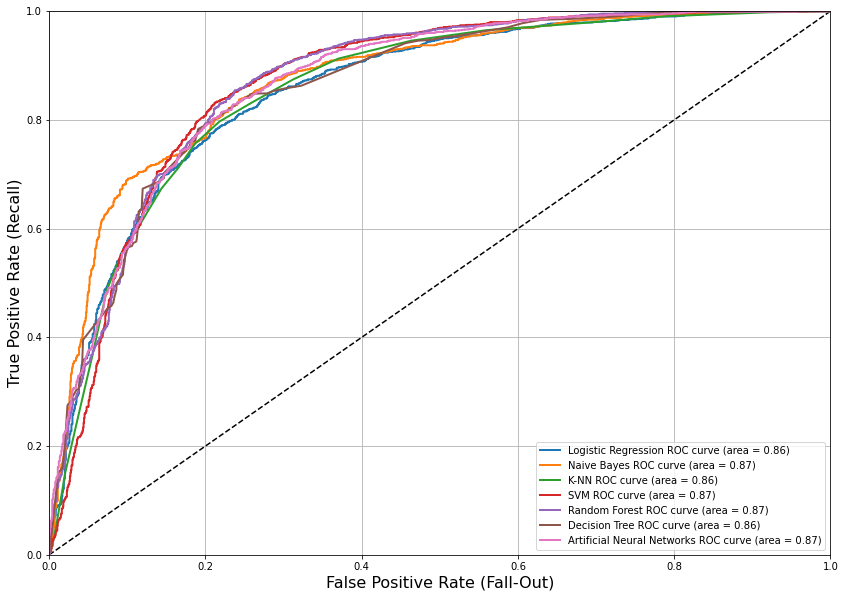

In [150]:
plt.figure(figsize=(14, 10))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') 
labels=['Logistic Regression','Naive Bayes', 'K-NN', 'SVM','Random Forest','Decision Tree','Artificial Neural Networks']
for idx,model in enumerate([logit_clf, bayes_clf, knn_clf, svc_clf, forest_clf, tree_clf, neural_clf]):
    y_scores = model.predict_proba(X[test_indices])[:,1]
    fpr, tpr, thresholds = roc_curve(y[test_indices], y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

# CROSS VALIDATION

In [83]:
K = dg.drop(columns='deposit')
L = dg['deposit']
scaler1 = StandardScaler()
K = scaler1.fit_transform(K)

cross_val1 = cross_val_score(logit_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
cross_val2 = cross_val_score(svc_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
cross_val3 = cross_val_score(knn_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
cross_val4 = cross_val_score(bayes_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
cross_val5 = cross_val_score(forest_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
cross_val6 = cross_val_score(tree_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
cross_val7 = cross_val_score(neural_clf, K, L, scoring = 'accuracy', cv=3, n_jobs=-1)
       
       
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val1) * 100:.2f}%")
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val2) * 100:.2f}%")
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val3) * 100:.2f}%")
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val4) * 100:.2f}%")
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val5) * 100:.2f}%")
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val6) * 100:.2f}%")
print(f"CROSS VALIDATION ACCURACY: {np.mean(cross_val7) * 100:.2f}%")

CROSS VALIDATION ACCURACY: 66.45%
CROSS VALIDATION ACCURACY: 58.24%
CROSS VALIDATION ACCURACY: nan%
CROSS VALIDATION ACCURACY: 64.12%
CROSS VALIDATION ACCURACY: 49.15%
CROSS VALIDATION ACCURACY: 44.44%
CROSS VALIDATION ACCURACY: 58.55%


Pada Cross Validation Score yang dilakukan pada data keseluruhan, ternyata banyak akurasi yang kurang dari 70%. Berarti data ini tergolong underfit, dan dibutuhkan kolom yang berkolerasi kuat untuk memprediksi orang tersebut deposit atau tidak.  

# MODEL INFERENCE

In [132]:
#HASILNYA BENAR
new_data1 = np.array([33, 9, 0, 5, 128, 0, 1]).reshape(1, -1)
print("Deposit =", svc_clf.predict(scaler.transform(new_data1)))

Deposit = [0]


In [131]:
#HASILNYA BENAR
new_data1 = np.array([62, 5, 1, 6, 208, 6, 2]).reshape(1, -1)
print("Deposit =", svc_clf.predict(scaler.transform(new_data1)))

Deposit = [1]


In [143]:
pred_result6 = []

model_pred = svc_clf.predict(X[test_indices])
pred_result6.append(model_pred)

In [146]:
pred_result_rf = pd.DataFrame({
    "Actual Target": y[test_indices],
    "Prediction with SVM": pred_result6[0] 
})

pred_result_rf

,Actual Target,Prediction with SVM
3094,0,0
3095,0,1
3096,0,0
3097,0,0
3098,0,0
...,...,...
9275,1,1
9276,1,1
9277,1,0
9278,1,1


https://h8-modelsvm-farandausten.herokuapp.com

# OVERALL ANALYSIS

### EDA ANALYSIS
1. Dalam data bank tersebut, y dalam tabel bank tersebut saya buat menjadi deposit dan akan diprediksi, dimana 0 yang berarti tidak deposit, jumlahnya sangat banyak dibanding orang yang deposit 
2. Data yang diberikan tidak berdistribusi normal untuk kolom numerik, dan pada kolom numerik ini datanya multimodal
3. Pada kolom pdays terdapat outliers yang bernilai 999 dan datanya harus diolah dulu supaya 999 ini tidak mempengaruhi data pada tabel itu untuk diprediksi  
4. Kolom duration, campaign dan age data yang diberikan skew kanan, artinya rata-ratanya lebih kecil dibanding mediannya
5. Kolom ueribor3pm masih banyak outlier-outlier artinya data-datanya tidak normal
6. Ada beberapa data yang distribusinya multimodal seperti kolom conf.price.idx dan conf.conf.idx

### MODEL ANALYSIS
- Pada tahap pertama ini dilakukan lah EDA dan cek value dari setiap kolom, dan dilakukan label encoder pada kolom kategorikal menjadi numerik supaya bisa dibaca oleh mesin 
- Lalu dicek korelasi, multicollinearity, dan uji statistik p-value apakah data tersebut berhubungan dengan prediksinya
- Sebelum pemodelan pada training dan testing, dilakukan resampling data 
- Setelah itu dilakukan cross validation pada data untuk dibagi menjadi data training dan data testing
- Setelah sudah dilakukan cross validation, lalu bagian terakhir untuk melakukan beberapa model klasifikasi untuk memprediksi maka dipakailah Hyper Parameter Tuning bernama Grid Search untuk memilih pemodelan terbaik
- Pada program ini akan dilakukan grid search dimana akan dicari akurasi yang terbaik. 
- Pada running Cross val score di semua model klasifikasi terlalu lama dan menyebabkan laptop crash, sehingga tidak bisa dijalankan. 

#### 1. Model Logistic Regression
Pada model logistic regression ini sudah diuji coba, dan didapatkan hasil terbaik dari sisi akurasi dimana solvernya adalah liblinear, penalty l2, dan C nya 0.9. Model logistic regression ini model yang paling bawah dari segi akurasi dibandingkan dengan model klassifikasi lain. Model ini yang jarang dipakai buat prediksi dikarenakan metode yang diambil terlalu simple yaitu dengan cara pemilihan pada garis tengahnya, sehingga jika klasifikasinya decision boundaries, klasifikasi ini bisa mendapatkan banyak error. 
- Training
> CLASSIFICATION REPORT:
                             0            1  accuracy    
        - precision     0.767219     0.834669  0.797155     
        - recall        0.853264     0.741028  0.797155     
        - f1-score      0.807957     0.785066  0.797155     
        - support    3094.000000  3093.000000  0.797155
 
- Testing
> CLASSIFICATION REPORT:
                             0            1  accuracy    
        - precision     0.744266     0.816160  0.775622     
        - recall        0.839586     0.711700  0.775622     
        - f1-score      0.789058     0.760359  0.775622  
        - support    1546.000000  1547.000000  0.775622

#### 2. Model SVM
Pada model SVM ini sudah dilakukan hyper parameter tuning dan didapat hasil terbaik dari sisi akurasi, dimana kernelnya adalah rbf, gammanya adalah auto, dan C nya 0,7. Metode SVM ini paling lama dijalankan sampai ada suara mesin di laptop. SVM ini merupakan model klassifikasi yang berakurasi tinggi selain random forest.
- Training
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.806702     0.833333   0.81946     
        - recall        0.840336     0.798577   0.81946     
        - f1-score      0.823176     0.815585   0.81946     
        - support    3094.000000  3093.000000   0.81946
 
- Testing
> CLASSIFICATION REPORT:
                               0            1  accuracy   
        - precision     0.786692     0.810774  0.798254     
        - recall        0.818241     0.778281  0.798254     
        - f1-score      0.802156     0.794195  0.798254     
        - support    1546.000000  1547.000000  0.798254 

#### 3. Model Naive Bayes
Pada model Naive Bayes Gaussian ini tidak dilakukan hyper parameter tuning karena pada gaussian tidak memiliki hyper parameter yang bisa dijadikan acuan, apalagi hyper parameternya hanya integer dan tidak ada pemilihan algoritma yang dipilih. Model Naive Bayes Gaussian ini lebih cocok jika memprediksi kalimat-kalimat yang akan keluar nantinya. Model naive bayes ini memiliki tingkat akuarasi paling rendah dibanding model klasifikasi yang lain  
- Training
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.715503     0.807375  0.753354     
        - recall        0.841306     0.665373  0.753354     
        - f1-score      0.773321     0.729529  0.753354     
        - support    3094.000000  3093.000000  0.753354
 
- Testing
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.759434     0.815319  0.784675    
        - recall        0.833118     0.736264  0.784675     
        - f1-score      0.794571     0.773777  0.784675     
        - support    1546.000000  1547.000000  0.784675

#### 4. Model K-NN
Pada model K-NN ini sudah dilakukan hyper parameter tuning dan didapat hasil terbaik dari sisi akurasi, metric atau penghitungan yang dipakai adalah rumus chebyshev, dengan n_neighbors / jumlah yang terdekat berjumlah 19, dan weightsnya uniform. Metode K-NN ini algoritmanya seperti rumus pythagoras, sehingga hanya mengambil data-data yang terdekat untuk dijadikan bagian dari klasifikasi. Jika decision boundaries banyak juga nanti prediksi yang gagal.
- Training
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.816875     0.839304  0.827703     
        - recall        0.844861     0.810540  0.827703     
        - f1-score      0.830632     0.824671  0.827703     
        - support    3094.000000  3093.000000  0.827703 
 
- Testing
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.776241     0.792943  0.784352     
        - recall        0.798836     0.769877  0.784352     
        - f1-score      0.787376     0.781240  0.784352     
        - support    1546.000000  1547.000000  0.784352

#### 5. Model Decision Tree
Pada model Decision Tree ini sudah dilakukan hyper parameter tuning dan didapat hasil terbaik dari sisi akurasi, dimana criterionnya adalah gini max_depth atau maksimal kedalamannya berjumlah 8, min_samples_leaf adalah 17, min_samples_split berjumlah 2 dan splitter yang dipasang best. Model decision tree sama dengan model random forest, cuma yang membedakan decision tree tidak mempunyai estimatornya yang akan digunakan. Model decision tree ini cocok untuk decision boundaries juga sama halnya random forest
- Training
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.791348     0.854787  0.819945     
        - recall        0.869101     0.770773  0.819945     
        - f1-score      0.828404     0.810609  0.819945     
        - support    3094.000000  3093.000000  0.819945
 
- Testing
> CLASSIFICATION REPORT:
                                0            1  accuracy    
         - precision     0.750000     0.813547  0.778209    
         - recall        0.834411     0.722043  0.778209     
         - f1-score      0.789957     0.765068  0.778209   
         - support    1546.000000  1547.000000  0.778209 


#### 6. Model  Random Forest
Pada model Random Forest ini sudah dilakukan hyper parameter tuning dan didapat hasil terbaik dari sisi akurasi, dimana criterionnya yang digunakan adalah entropy, lalu max_depthnya 9, max_featuresnya berjumlah 4, dan n_estimators: 1000. Yang membedakan random forest dan decision tree adalah random forest punya hyper parameter menghitung berapa estimatornya. Model random forest ini termasuk yang paling lama karena random forest ini merupakan algoritma yang paling susah, sehingga membutuhkan waktu yang lama untuk merunningnya. Dimana dilakukan data training dan testing dengan hasil akurasi tidak berbanding jauh, berarti data yang diberikan sesuai tetapi belum ada data yang berkorelasi kuat untuk memprediksinya. 
- Training
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.834314     0.864773  0.848877     
        - recall        0.870718     0.827029  0.848877     
        - f1-score      0.852127     0.845480  0.848877     
        - support    3094.000000  3093.000000  0.848877
 
- Testing
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.783699     0.802403  0.792758     
        - recall        0.808538     0.776988  0.792758     
        - f1-score      0.795925     0.789491  0.792758   
        - support    1546.000000  1547.000000  0.792758

#### 7. Model Artificial Neural Networks
Pada model Artificial Neural Networks ini sudah dilakukan hyper parameter tuning dan didapat hasil terbaik dari sisi akurasi, dimana activationnya adalah relu, alpha yang dipasang 0.0003, learning_ratenya constant dan solver yang digunakan adam. Akurasi diantara keduanya tidak berbanding jauh berarti tidak terjadi overfit. Pada proses running pada model ANN lumayan lama sekitar 25 menit.
- Training
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.820819     0.822633  0.821723     
        - recall        0.823206     0.820239  0.821723     
        - f1-score      0.822011     0.821434  0.821723    
        - support    3094.000000  3093.000000  0.821723
 
- Testing
> CLASSIFICATION REPORT:
                               0            1  accuracy    
        - precision     0.786352     0.794754  0.790495     
        - recall        0.797542     0.783452  0.790495     
        - f1-score      0.791908     0.789062  0.790495    
        - support    1546.000000  1547.000000  0.790495

##### Jadi setelah dilakukan training dan testing pada keseluruhan model yang dilakukan pada data, bahwa:
- Data antara training dan testing pada keseluruhan model tidak terjadi overfit atau underfit, yang artinya data yang dimasukkan pas, sehingga akurasi pada pemodelan training dan testing tidak jauh berbeda. Hanya berbeda pada model gaussian naive bayes.
- Akurasi yang didapatkan pada keseluruhan model mencapai 80% yang artinya sudah cukup ada korelasi dan koefisien yang kuat yang mempengaruhi deposit
- Precision, Recall, dan F1 dilakukan semua pada model training dan testing menghasilkan rata-rata 80%, dan didapat hasil yang terbaik yaitu Algoritma Pemodelan SVM pada training dan testingnya, setelah itu adalah random forest
- ROC Curve yang dilakukan pada semua model klasifikasi rata-rata sama menghasilkan 0,79, sehingga kita definisikan semakin tinggi TPR dan semakin kecil FPR maka thresholdnya semakin bagus